In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mtcars=pd.read_csv("/Users/Phani deep/Documents/mtcars.csv")

In [5]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
transtype=[]
for row in mtcars['am']:
    if row==0:
        transtype.append("Automatic")
    else:
        transtype.append("Manual")
mtcars["transtype"]=transtype

In [8]:
mileagetype=[]
for row in mtcars['mpg']:
    if row >= 22:
        mileagetype.append("High Mileage")
    elif row >= 19:
        mileagetype.append("Median Mileage")
    else:
        mileagetype.append("Low Mileage")
mtcars['mileagetype']=mileagetype

In [9]:
weighttype=[]
for row in mtcars['wt']:
    if row >= 3.6:
        weighttype.append("Heavy Weight")
    elif row >= 2.5:
        weighttype.append("Median Weight")
    else:
        weighttype.append("Low Weight")
mtcars['weighttype']=weighttype

In [10]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,transtype,mileagetype,weighttype
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Manual,Median Mileage,Median Weight
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Manual,Median Mileage,Median Weight
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Manual,High Mileage,Low Weight
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Automatic,Median Mileage,Median Weight
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Automatic,Low Mileage,Median Weight


In [18]:
transtypetable=pd.value_counts(mtcars['transtype'])
transtypetable

Automatic    19
Manual       13
Name: transtype, dtype: int64

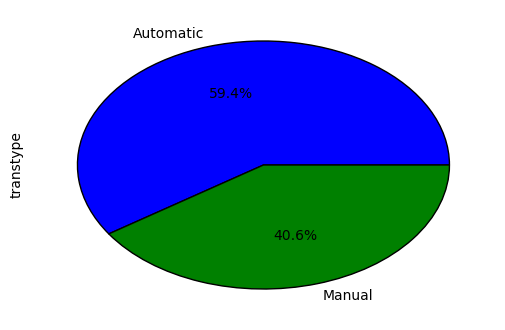

In [19]:
transtypetable.plot(kind="pie", autopct='%1.1f%%')

In [14]:
transtypetable=pd.value_counts(mtcars['mpg'])
transtypetable

21.4    2
10.4    2
22.8    2
21.0    2
19.2    2
30.4    2
15.2    2
14.3    1
33.9    1
18.1    1
15.5    1
19.7    1
21.5    1
15.8    1
13.3    1
14.7    1
16.4    1
18.7    1
32.4    1
15.0    1
24.4    1
26.0    1
27.3    1
17.3    1
17.8    1
Name: mpg, dtype: int64

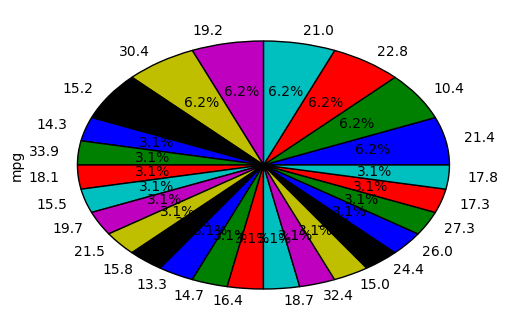

In [15]:
transtypetable.plot(kind="pie", autopct='%1.1f%%')

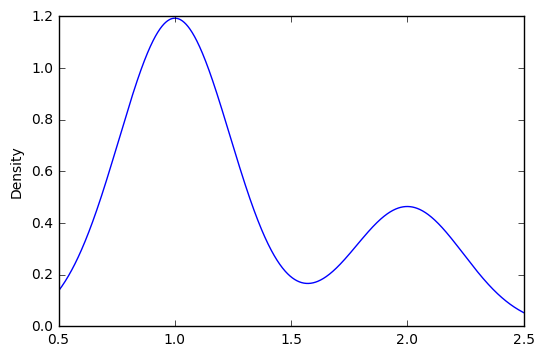

In [17]:
transtypetable.plot(kind="density")

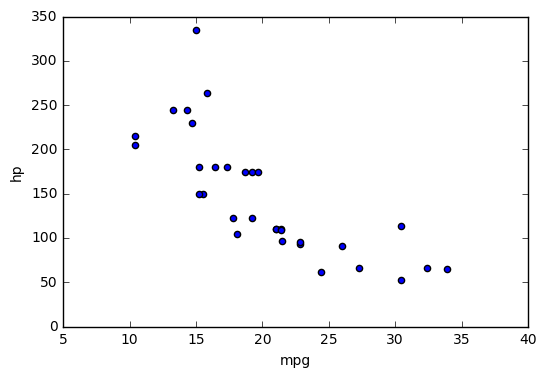

In [22]:
mtcars.plot(kind="scatter",x="mpg",y="hp")

In [24]:
mtcars.groupby('transtype').mean()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
transtype,,,,,,,,,,,
Automatic,17.147368,6.947368,290.378947,160.263158,3.286316,3.768895,18.183158,0.368421,0.0,3.210526,2.736842
Manual,24.392308,5.076923,143.530769,126.846154,4.050000,2.411000,17.360000,0.538462,1.0,4.384615,2.923077


In [29]:
automatic=mtcars[mtcars["transtype"]=="Automatic"]
manual=mtcars[mtcars["transtype"]=="Manual"]

In [30]:
from scipy import stats as st

In [31]:
st.ttest_ind(automatic["mpg"],manual['mpg'],equal_var=False)

Ttest_indResult(statistic=-3.767123145144923, pvalue=0.0013736383330710345)

In [35]:
highmil=mtcars[mtcars['mileagetype']=="High Mileage"]
midmil=mtcars[mtcars['mileagetype']=="Median Mileage"]
lowmil=mtcars[mtcars['mileagetype']=="Low Mileage"]

In [36]:
st.f_oneway(highmil["mpg"],midmil["mpg"],lowmil["mpg"])

F_onewayResult(statistic=56.935662310702845, pvalue=9.0796150484630942e-11)

In [34]:
mtcars.groupby('mileagetype').mean()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mileagetype,,,,,,,,,,,
High Mileage,27.822222,4.000000,101.711111,78.111111,4.107778,2.210889,19.100000,0.888889,0.777778,4.222222,1.555556
Low Mileage,15.206667,7.733333,329.066667,198.800000,3.254000,3.936267,17.125333,0.133333,0.133333,3.333333,3.466667
Median Mileage,20.550000,5.750000,191.462500,126.125000,3.663750,3.001250,17.797500,0.500000,0.500000,3.750000,3.000000


In [37]:
pd.crosstab(mtcars.transtype,mtcars.mileagetype)

mileagetype,High Mileage,Low Mileage,Median Mileage
transtype,,,
Automatic,2,13,4
Manual,7,2,4


In [38]:
st.chi2_contingency(pd.crosstab(mtcars.transtype,mtcars.mileagetype))

(10.073594242015295,
 0.0064945161915184544,
 2,
 array([[ 5.34375,  8.90625,  4.75   ],
        [ 3.65625,  6.09375,  3.25   ]]))

In [39]:
st.chi2_contingency(pd.crosstab(mtcars.weighttype,mtcars.mileagetype))

(22.266666666666666, 0.00017735151269303971, 4, array([[ 2.25,  3.75,  2.  ],
        [ 2.25,  3.75,  2.  ],
        [ 4.5 ,  7.5 ,  4.  ]]))

In [40]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


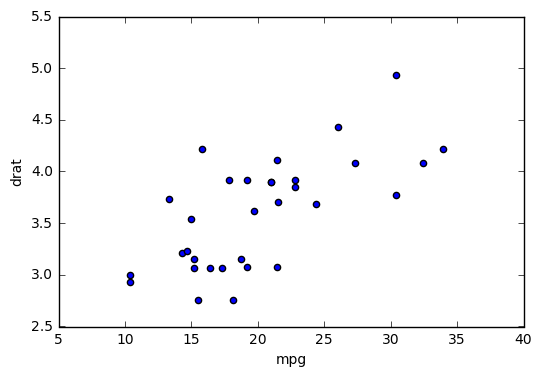

In [41]:
mtcars.plot(kind="scatter",x="mpg",y="drat")

In [42]:
mtcars.cov()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,36.324103,-9.172379,-633.097208,-320.732056,2.195064,-5.116685,4.509149,2.017137,1.803931,2.135685,-5.363105
cyl,-9.172379,3.189516,199.660282,101.931452,-0.668367,1.367371,-1.886855,-0.729839,-0.465726,-0.649194,1.520161
disp,-633.097208,199.660282,15360.799829,6721.158669,-47.064019,107.684204,-96.051681,-44.377621,-36.564012,-50.802621,79.068750
hp,-320.732056,101.931452,6721.158669,4700.866935,-16.451109,44.192661,-86.770081,-24.987903,-8.320565,-6.358871,83.036290
drat,2.195064,-0.668367,-47.064019,-16.451109,0.285881,-0.372721,0.087141,0.118649,0.190151,0.275988,-0.078407
wt,-5.116685,1.367371,107.684204,44.192661,-0.372721,0.957379,-0.305482,-0.273661,-0.338105,-0.421081,0.675790
qsec,4.509149,-1.886855,-96.051681,-86.770081,0.087141,-0.305482,3.193166,0.670565,-0.204960,-0.280403,-1.894113
vs,2.017137,-0.729839,-44.377621,-24.987903,0.118649,-0.273661,0.670565,0.254032,0.042339,0.076613,-0.463710
am,1.803931,-0.465726,-36.564012,-8.320565,0.190151,-0.338105,-0.204960,0.042339,0.248992,0.292339,0.046371
gear,2.135685,-0.649194,-50.802621,-6.358871,0.275988,-0.421081,-0.280403,0.076613,0.292339,0.544355,0.326613


In [47]:
y=mtcars['mpg']
x=mtcars[['hp','wt','am']]
x=sm.add_constant(x)

In [48]:
import statsmodels.api as sm

In [49]:
model=sm.OLS(y,x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     48.96
Date:                Sun, 11 Jun 2017   Prob (F-statistic):           2.91e-11
Time:                        16:23:52   Log-Likelihood:                -73.067
No. Observations:                  32   AIC:                             154.1
Df Residuals:                      28   BIC:                             160.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.0029      2.643     12.867      0.0